### Customer churn prediction with Logistic Regression

### Importing packages


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample

### Load Data From CSV File


In [2]:
churn_df = pd.read_csv("E:\\Jyoti new data\\codsoft tasks\\task_3\\Churn_Modelling.csv")
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<h2 id="preprocessing">Data pre-processing and selection</h2>


In [3]:
# write your code here
print(churn_df.shape)
print(churn_df.columns)


(10000, 14)
Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [4]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
churn_df.shape

(10000, 14)

In [6]:
churn_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
#y = np.asarray(churn_df['Exited'])
#y [0:5]
churn_df.size

140000

In [8]:

#X = preprocessing.StandardScaler().fit(X).transform(X)
#X[0:5]
churn_df.columns = churn_df.columns.str.strip()
churn_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [9]:
churn_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
churn_df.columns = churn_df.columns.str.lower()
churn_df.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

In [11]:
duplicates = churn_df.duplicated(subset=['customerid'], keep=False)
duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [12]:
churn_df['exited'].value_counts().to_frame()

,count
exited,
0,7963
1,2037


In [13]:
churn_0 = churn_df[churn_df['exited']==0]
churn_0
churn_1 = churn_df[churn_df['exited']==1]
churn_1

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,9982,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9982,9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [14]:
churn_0 = resample(churn_0, n_samples = 2037,replace = False, random_state = 42)
churn_0.shape

(2037, 14)

In [15]:
churn_df_new = pd.concat([churn_0,churn_1])

In [16]:
churn_df_new['exited'].value_counts().to_frame()

,count
exited,
0,2037
1,2037


In [17]:
churn_df_new['exited'].value_counts().to_frame()

,count
exited,
0,2037
1,2037


### Data Visualization

E:\Python setup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Python setup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Python setup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='exited', ylabel='count'>

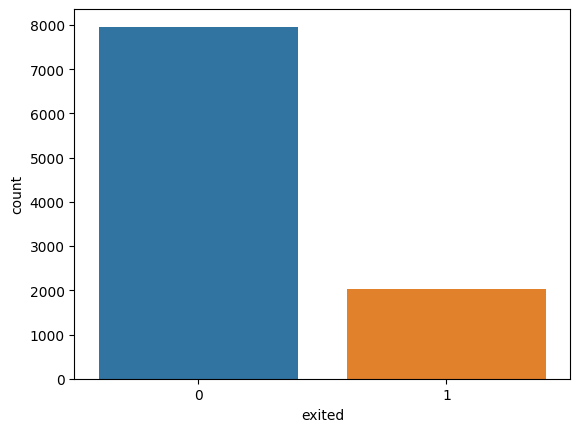

In [18]:
sns.countplot(data=churn_df , x = 'exited')

E:\Python setup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Python setup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Python setup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='exited', ylabel='count'>

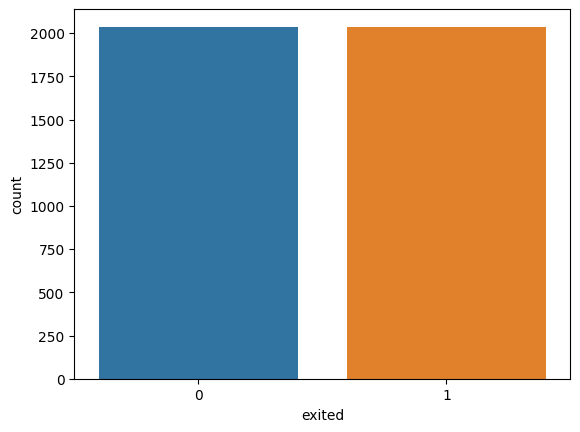

In [19]:
sns.countplot(data=churn_df_new , x = 'exited')

<Axes: xlabel='geography'>

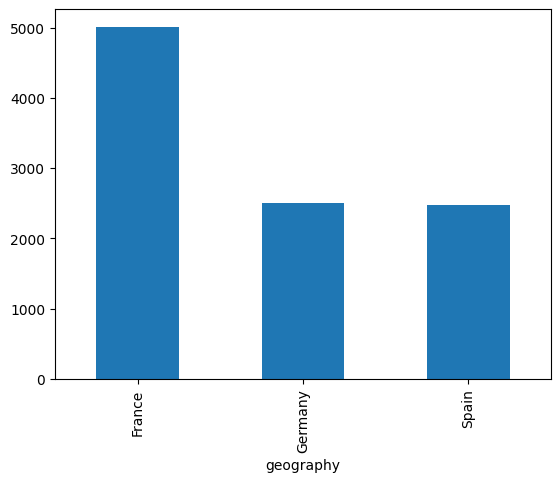

In [20]:
churn_df['geography'].value_counts().plot(kind='bar')

<Axes: xlabel='gender'>

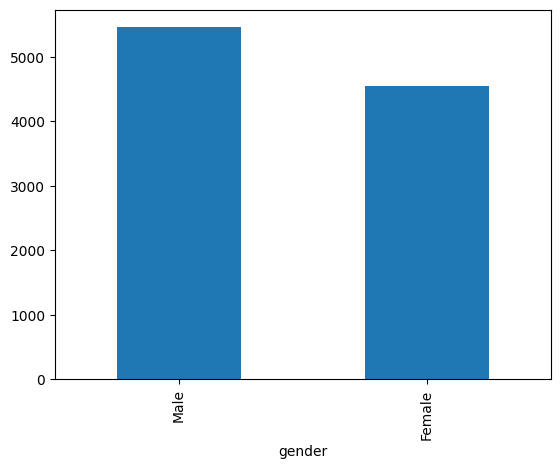

In [21]:
churn_df['gender'].value_counts().plot(kind='bar')

<Axes: xlabel='age'>

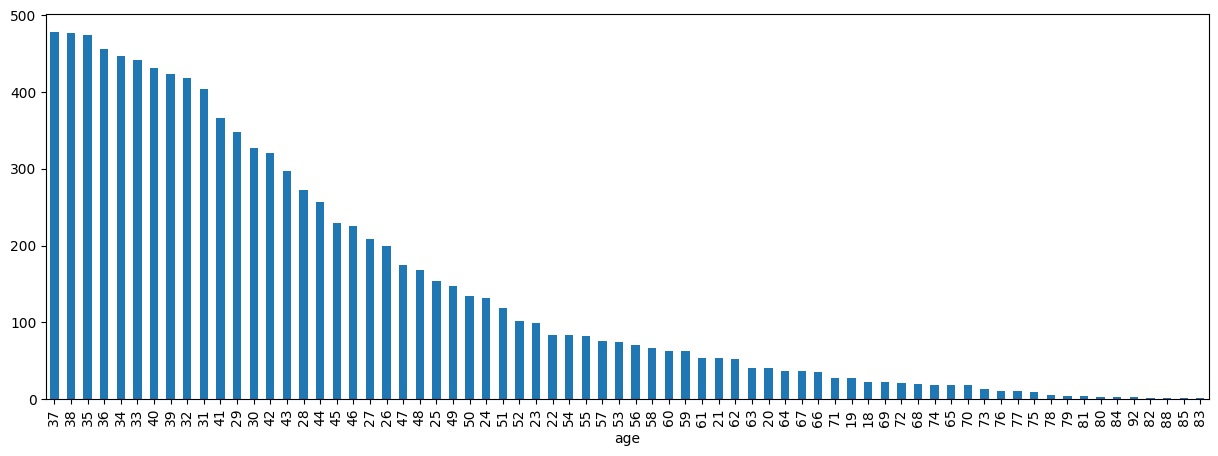

In [22]:
plt.figure(figsize=(15,5))
churn_df['age'].value_counts().plot(kind='bar')

In [23]:
churn_df.drop(['rownumber', 'customerid', 'geography', 'surname','gender'], axis =1 , inplace = True)

In [24]:
churn_df_new.drop(['rownumber', 'customerid', 'geography', 'surname','gender'], axis =1 , inplace = True)

In [25]:
churn_df_new

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
8165,606,37,8,154712.58,2,1,0,89099.18,0
6409,683,33,9,0.00,2,1,1,38784.42,0
2157,744,44,3,0.00,2,1,1,189016.14,0
1618,697,27,8,141223.68,2,1,0,90591.15,0
1633,562,35,7,0.00,1,0,0,48869.67,0
...,...,...,...,...,...,...,...,...,...
9981,498,42,3,152039.70,1,1,1,53445.17,1
9982,655,46,7,137145.12,1,1,0,115146.40,1
9991,597,53,4,88381.21,1,1,0,69384.71,1
9997,709,36,7,0.00,1,0,1,42085.58,1


E:\Python setup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Python setup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Python setup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Python setup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Python se

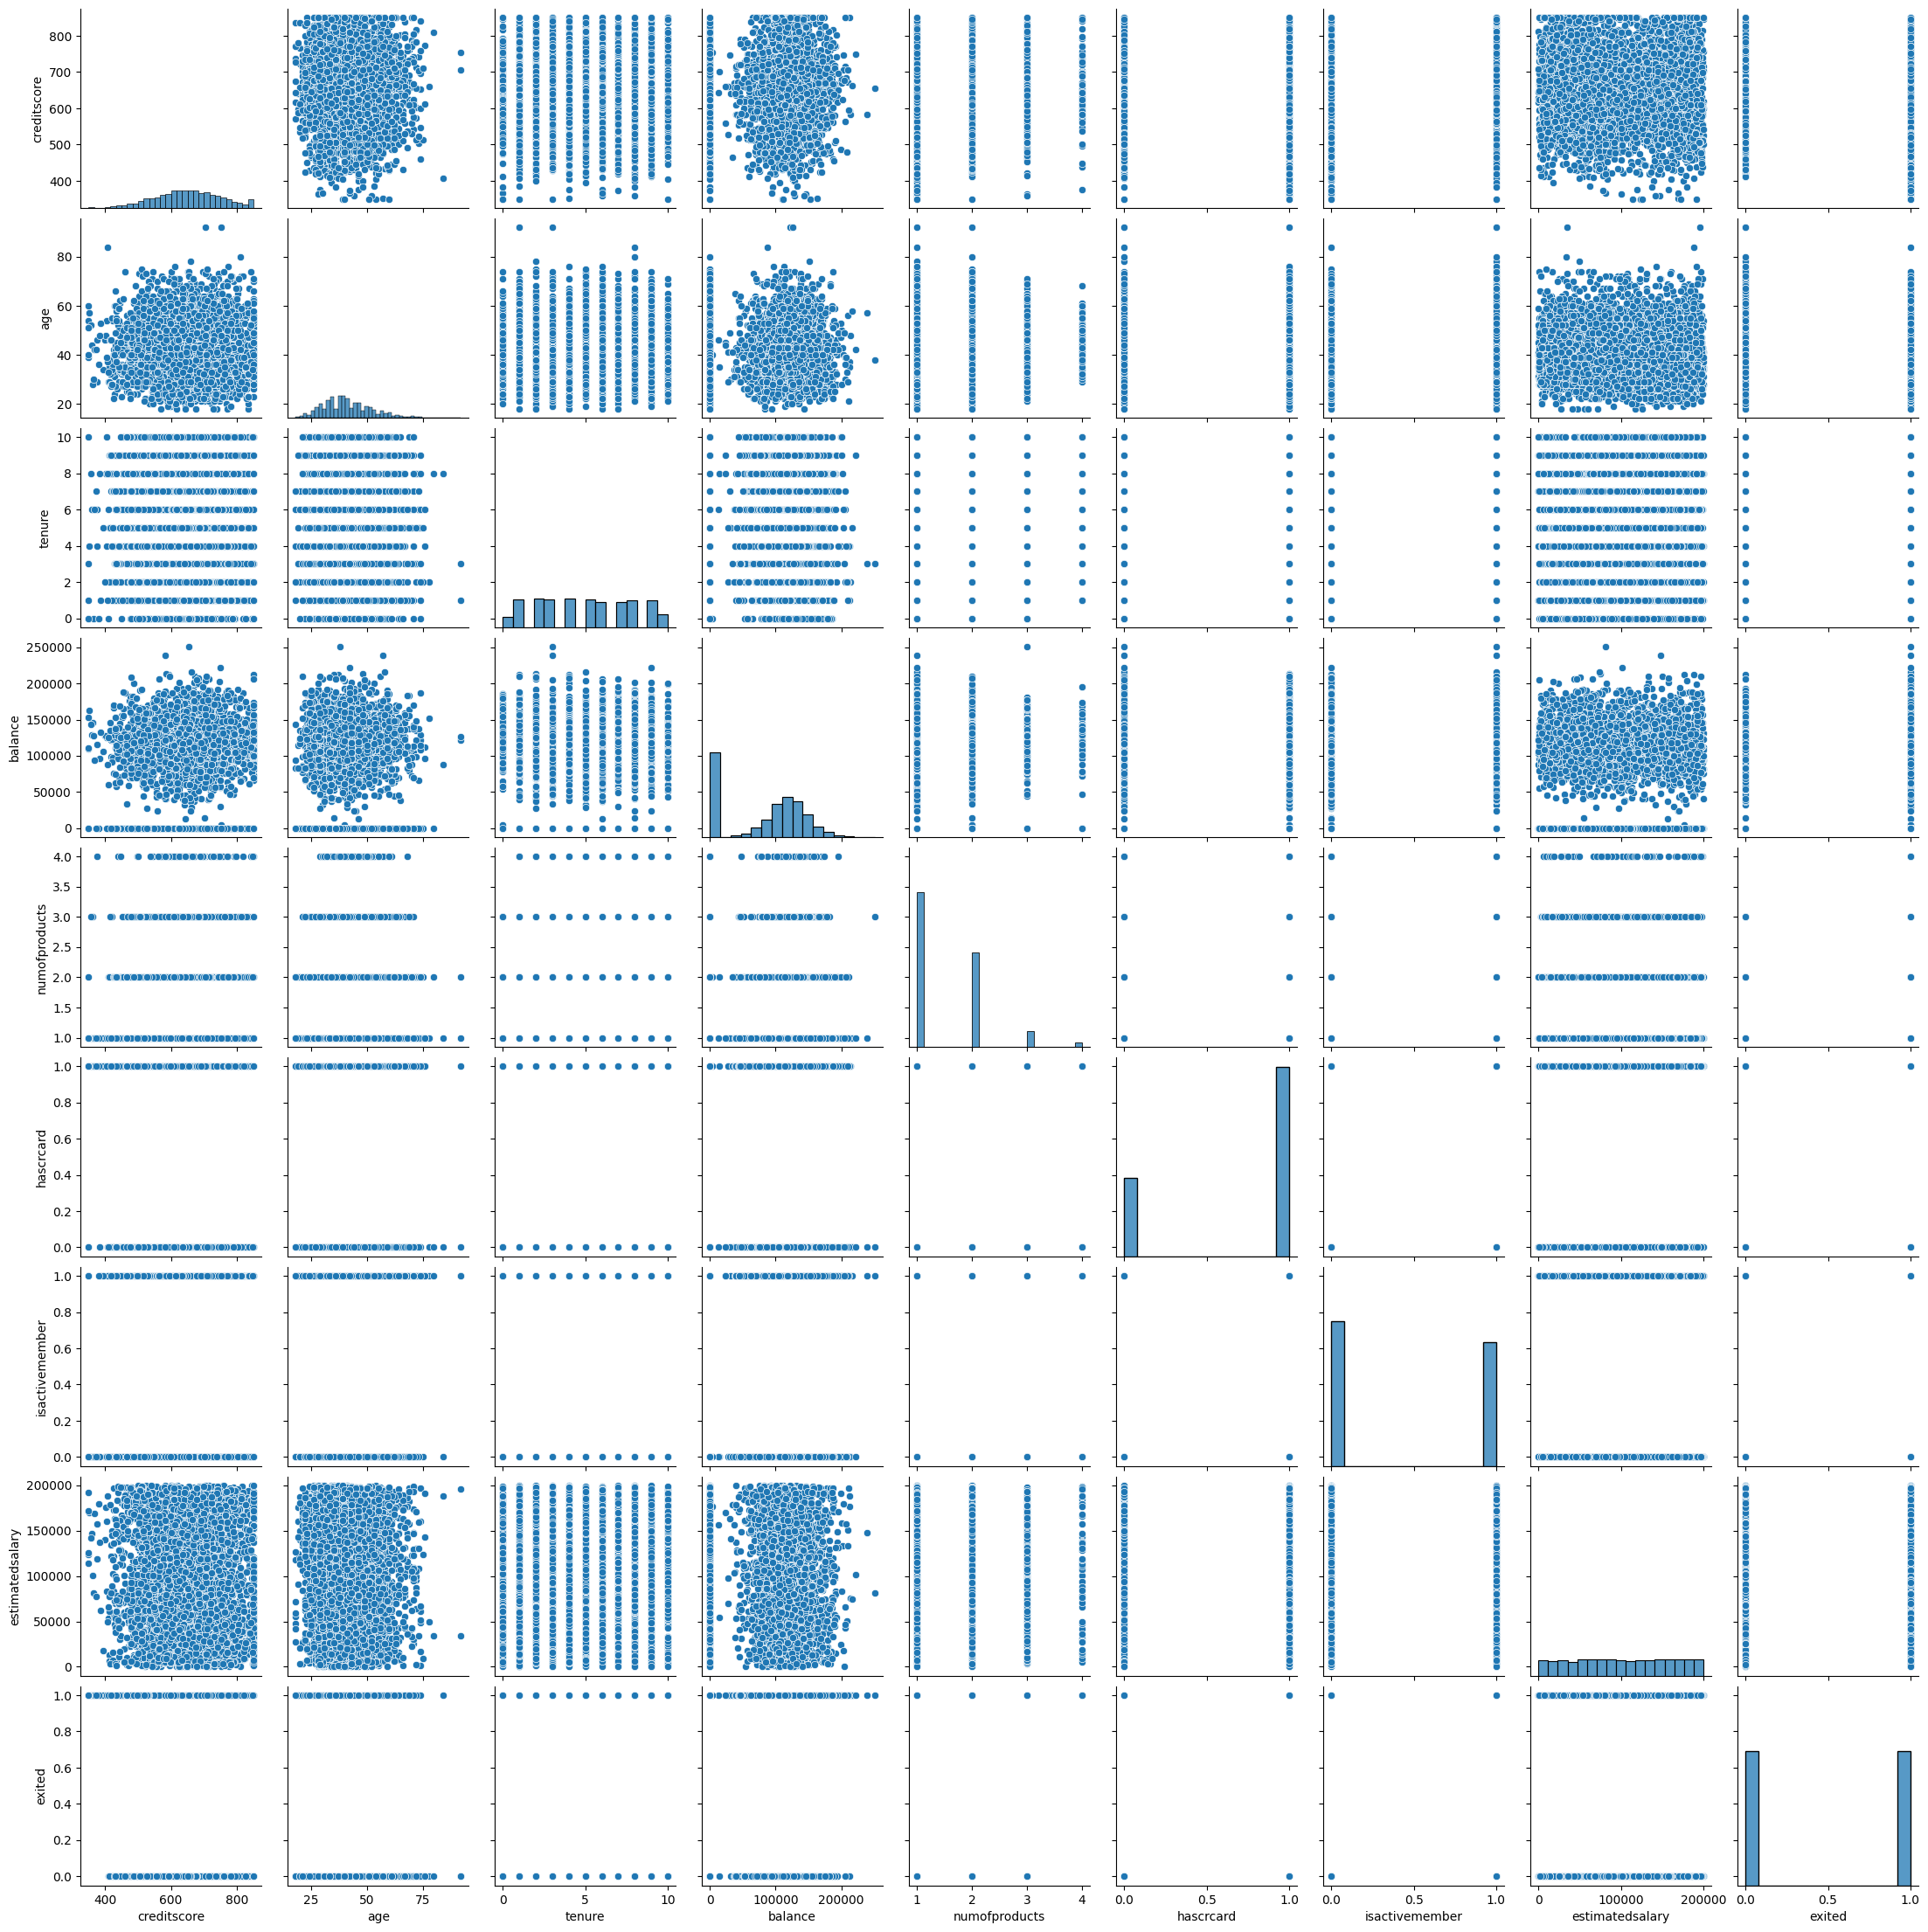

In [26]:
sns.pairplot(churn_df_new)
plt.show()

In [27]:
churn_df_new.corr()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
creditscore,1.000000,-0.019635,0.019156,0.022088,0.007916,0.002756,0.012992,-0.010973,-0.034660
age,-0.019635,1.000000,-0.029303,0.040785,-0.031884,-0.031115,0.016498,0.006669,0.343870
tenure,0.019156,-0.029303,1.000000,0.006340,0.019054,0.018600,-0.032413,0.025749,-0.016491
balance,0.022088,0.040785,0.006340,1.000000,-0.189561,-0.008388,-0.025617,0.001774,0.146820
numofproducts,0.007916,-0.031884,0.019054,-0.189561,1.000000,-0.008130,0.037570,0.008241,-0.054669
hascrcard,0.002756,-0.031115,0.018600,-0.008388,-0.008130,1.000000,-0.031892,-0.024178,-0.017800
isactivemember,0.012992,0.016498,-0.032413,-0.025617,0.037570,-0.031892,1.000000,-0.007396,-0.201877
estimatedsalary,-0.010973,0.006669,0.025749,0.001774,0.008241,-0.024178,-0.007396,1.000000,0.006173
exited,-0.034660,0.343870,-0.016491,0.146820,-0.054669,-0.017800,-0.201877,0.006173,1.000000


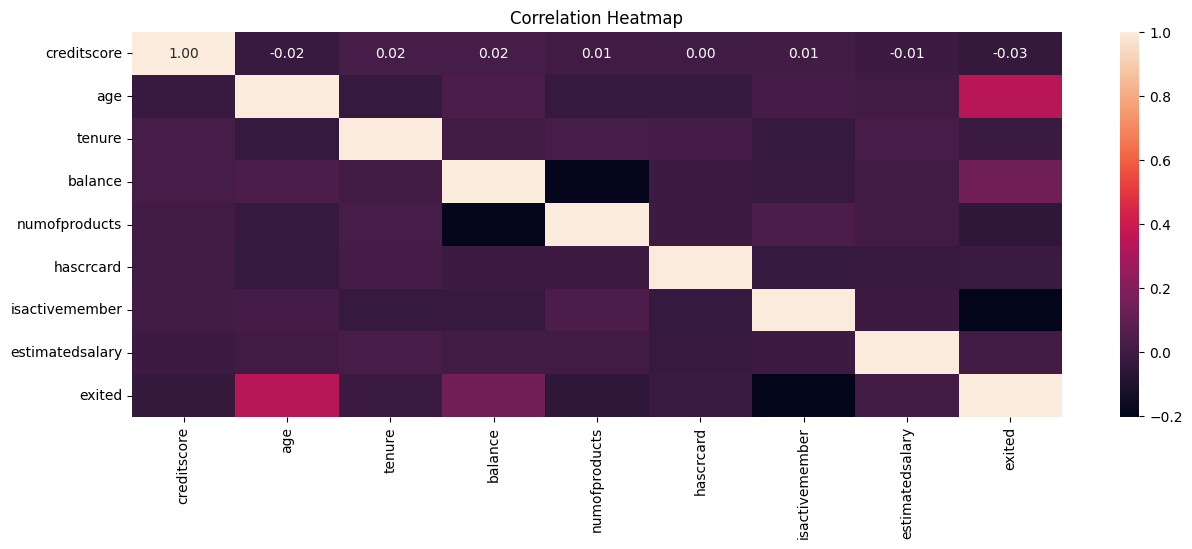

In [28]:
plt.figure(figsize=(15,5))
sns.heatmap(churn_df_new.corr(),annot=True , fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [29]:
df_corr_exited = churn_df_new.corr()['exited'].to_frame()
df_corr_exited

,exited
creditscore,-0.034660
age,0.343870
tenure,-0.016491
balance,0.146820
numofproducts,-0.054669
hascrcard,-0.017800
isactivemember,-0.201877
estimatedsalary,0.006173
exited,1.000000


E:\Python setup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Python setup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Python setup\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='exited'>

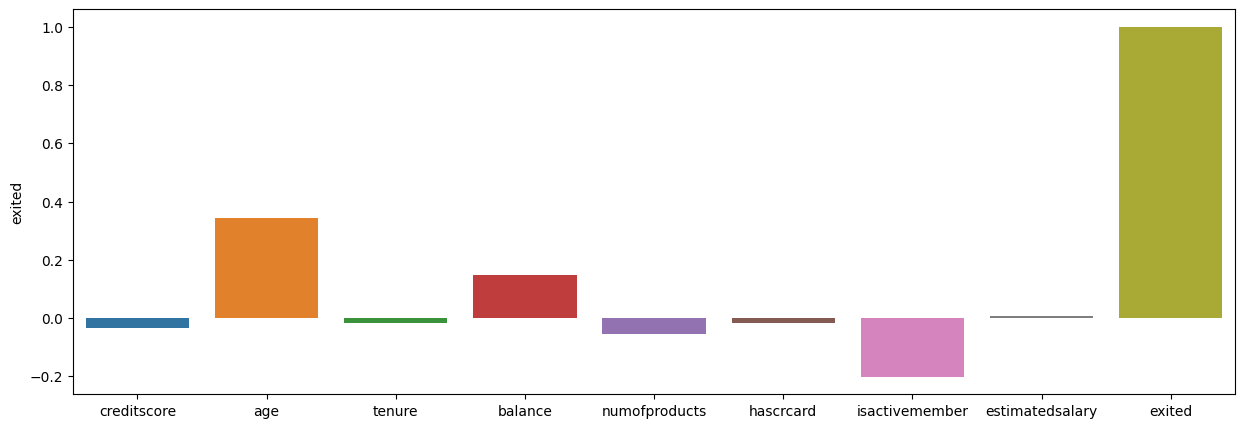

In [30]:
plt.figure(figsize=(15,5))
sns.barplot(data=df_corr_exited,x=df_corr_exited.index,y='exited')

In [31]:
X = churn_df_new.iloc[:,0:8]
Y = churn_df_new.iloc[:,8]
X

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary
8165,606,37,8,154712.58,2,1,0,89099.18
6409,683,33,9,0.00,2,1,1,38784.42
2157,744,44,3,0.00,2,1,1,189016.14
1618,697,27,8,141223.68,2,1,0,90591.15
1633,562,35,7,0.00,1,0,0,48869.67
...,...,...,...,...,...,...,...,...
9981,498,42,3,152039.70,1,1,1,53445.17
9982,655,46,7,137145.12,1,1,0,115146.40
9991,597,53,4,88381.21,1,1,0,69384.71
9997,709,36,7,0.00,1,0,1,42085.58


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3, random_state=3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2851, 8) (2851,)
Test set: (1223, 8) (1223,)


In [33]:
X_train

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary
5042,850,33,3,0.00,2,1,1,11159.19
9754,673,40,1,121629.22,1,1,1,3258.60
5507,583,40,3,54428.37,1,1,0,109638.78
6277,604,34,3,0.00,2,1,0,38587.70
7138,430,66,6,135392.31,2,1,1,172852.06
...,...,...,...,...,...,...,...,...
4579,534,52,1,0.00,3,1,1,104035.41
1109,595,31,4,0.00,2,1,0,189995.86
6188,835,47,5,108289.28,2,1,1,45859.55
7166,618,40,8,0.00,2,1,0,80204.38


In [34]:
X_test

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary
5972,548,49,9,108437.89,1,0,0,127022.87
6518,521,49,4,82940.25,2,0,0,62413.01
6969,619,38,6,0.00,2,1,1,117616.29
1006,561,33,6,0.00,2,1,0,45261.47
9791,825,35,6,118336.95,1,1,0,26342.33
...,...,...,...,...,...,...,...,...
1644,663,37,7,0.00,1,1,1,185210.63
3923,764,41,7,0.00,2,0,0,134878.34
3894,595,37,2,157084.99,1,1,0,134767.13
6083,519,38,1,114141.64,1,1,1,60988.21


In [35]:
y_train

5042    0
9754    0
5507    1
6277    0
7138    1
       ..
4579    1
1109    0
6188    1
7166    0
5994    0
Name: exited, Length: 2851, dtype: int64

In [36]:
y_test.head()

5972    1
6518    1
6969    0
1006    0
9791    1
Name: exited, dtype: int64

In [37]:
lr_model = LogisticRegression(max_iter = 500)
lr_model

LogisticRegression(max_iter=500)

In [38]:
lr_model.fit(X_train,y_train)

LogisticRegression(max_iter=500)

Now we can predict using our test set:


In [39]:
predictions = lr_model.predict(X_test)
print(predictions)
len(predictions)

[1 1 0 ... 1 1 0]


1223

<h2 id="evaluation">Evaluation</h2>


In [40]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, predictions ,pos_label=0)

0.4927536231884058

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,recall_score,precision_score,accuracy_score,f1_score,ConfusionMatrixDisplay


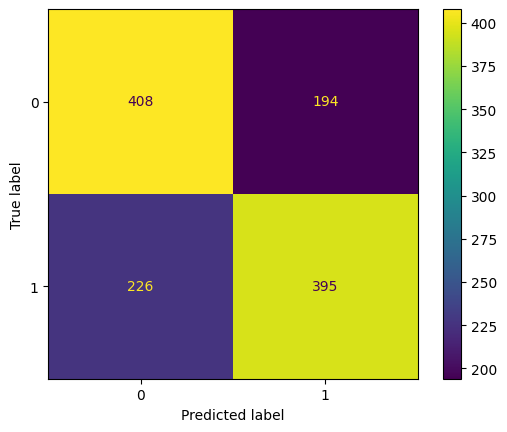

In [42]:
# Compute confusion matrix
cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,predictions,labels=lr_model.classes_),display_labels=lr_model.classes_)
cmd.plot()

In [43]:
precision_score(y_test,predictions)

0.6706281833616299

In [44]:
recall_score(y_test,predictions)

0.6360708534621579

In [45]:
accuracy_score(y_test,predictions)

0.6565821749795585

In [46]:
f1_score(y_test,predictions)

0.6528925619834711